In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
BASE_FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/Final Project'
print(os.listdir(BASE_FILE_PATH))

['Keys', 'Setting up connection with Git-Hub.ipynb', 'updated_dataset.csv', 'EDA.ipynb']


In [4]:
df = pd.read_csv(os.path.join(BASE_FILE_PATH, 'updated_dataset.csv'))
df.head()

,match_id,game_creation,game_duration,game_mode,game_type,game_version,map_id,participant_id,summoner_id,puuid,...,assists,total_damage_dealt,total_damage_taken,gold_earned,vision_score,total_minions_killed,team_position,win,game_creation_dt,game_duration_min
0,NA1_4998871315,1715847289856,1665,CLASSIC,MATCHED_GAME,14.10.584.5961,11,1,2L5Pg_5bWVXlCPgz2Ibnug53iy-hR4da7bwWSPoXXnvQT2...,8gK6HwW-9oNCit7oWMYcfTWNCD0P_y3S_LfALE2JI9BcJc...,...,11,171718,32084,14676,19,201,TOP,True,2024-05-16 08:14:49.856,27.75
1,NA1_4998871315,1715847289856,1665,CLASSIC,MATCHED_GAME,14.10.584.5961,11,2,bFLwzgKVpvm0X3oEx2hC8RJnaHYN6JxwhHed6ZHvlw12hNE6,8WGtLIFEtbGywb_CAx3jCE9l1sm6gvhzUd3_vglHKqVcyi...,...,15,184645,29335,12272,62,29,JUNGLE,True,2024-05-16 08:14:49.856,27.75
2,NA1_4998871315,1715847289856,1665,CLASSIC,MATCHED_GAME,14.10.584.5961,11,3,E3eFh1D7cTJVMOzmFvF7o8XZWx-96a8TOA8obPhS0hL4S4o,zcSkZmvbs1zx9QUsmwhgr9vojju4od6usxtWp9sC7qd9wB...,...,19,101757,14785,10159,29,173,MIDDLE,True,2024-05-16 08:14:49.856,27.75
3,NA1_4998871315,1715847289856,1665,CLASSIC,MATCHED_GAME,14.10.584.5961,11,4,S1Tq4jLLhrJQSBIYlTBc5_K_DscqdQ73iQWbvso3ulvqaOu9,L47zkOYWG2yG95qQxCrfBBuHsP_PT_i7OcvvWBYJzaSIgi...,...,6,141286,13295,13046,16,190,BOTTOM,True,2024-05-16 08:14:49.856,27.75
4,NA1_4998871315,1715847289856,1665,CLASSIC,MATCHED_GAME,14.10.584.5961,11,5,7Le8P-DYzdnvZIuprdubglWBw84XCxLEDx9S-IZTl58Q5S...,ZvkEF0glNexlbqoKbzOgEcuHJFmFfrYnb1OEX67k5H-q-Y...,...,18,26488,13879,8273,30,13,UTILITY,True,2024-05-16 08:14:49.856,27.75


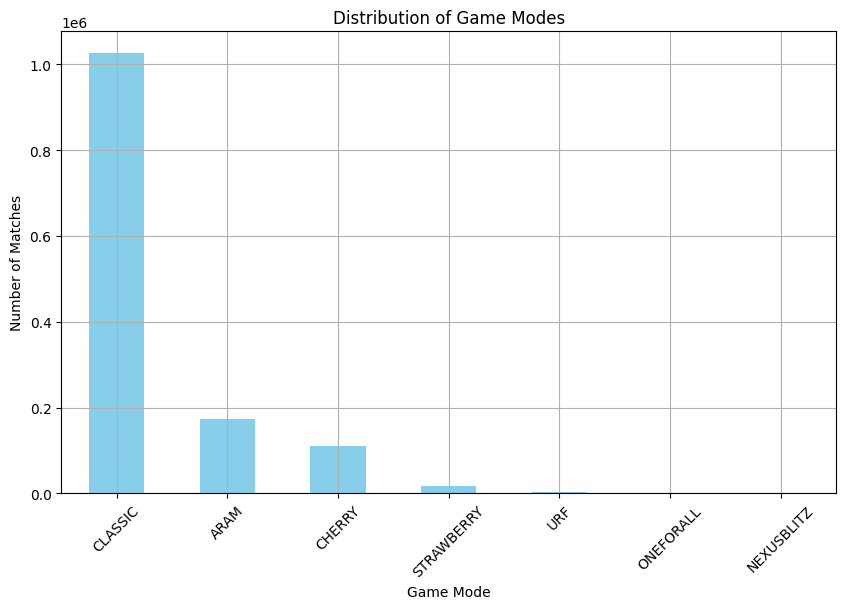

In [5]:
game_mode_counts = df['game_mode'].value_counts()

# Creating a bar plot for the game mode counts
plt.figure(figsize=(10, 6))
game_mode_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Game Modes')
plt.xlabel('Game Mode')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [6]:
print(df.columns)

Index(['match_id', 'game_creation', 'game_duration', 'game_mode', 'game_type',
       'game_version', 'map_id', 'participant_id', 'summoner_id', 'puuid',
       'champion_id', 'spell1_id', 'spell2_id', 'item0', 'item1', 'item2',
       'item3', 'item4', 'item5', 'item6', 'kills', 'deaths', 'assists',
       'total_damage_dealt', 'total_damage_taken', 'gold_earned',
       'vision_score', 'total_minions_killed', 'team_position', 'win',
       'game_creation_dt', 'game_duration_min'],
      dtype='object')


<ipython-input-7-815505e0ea17>:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


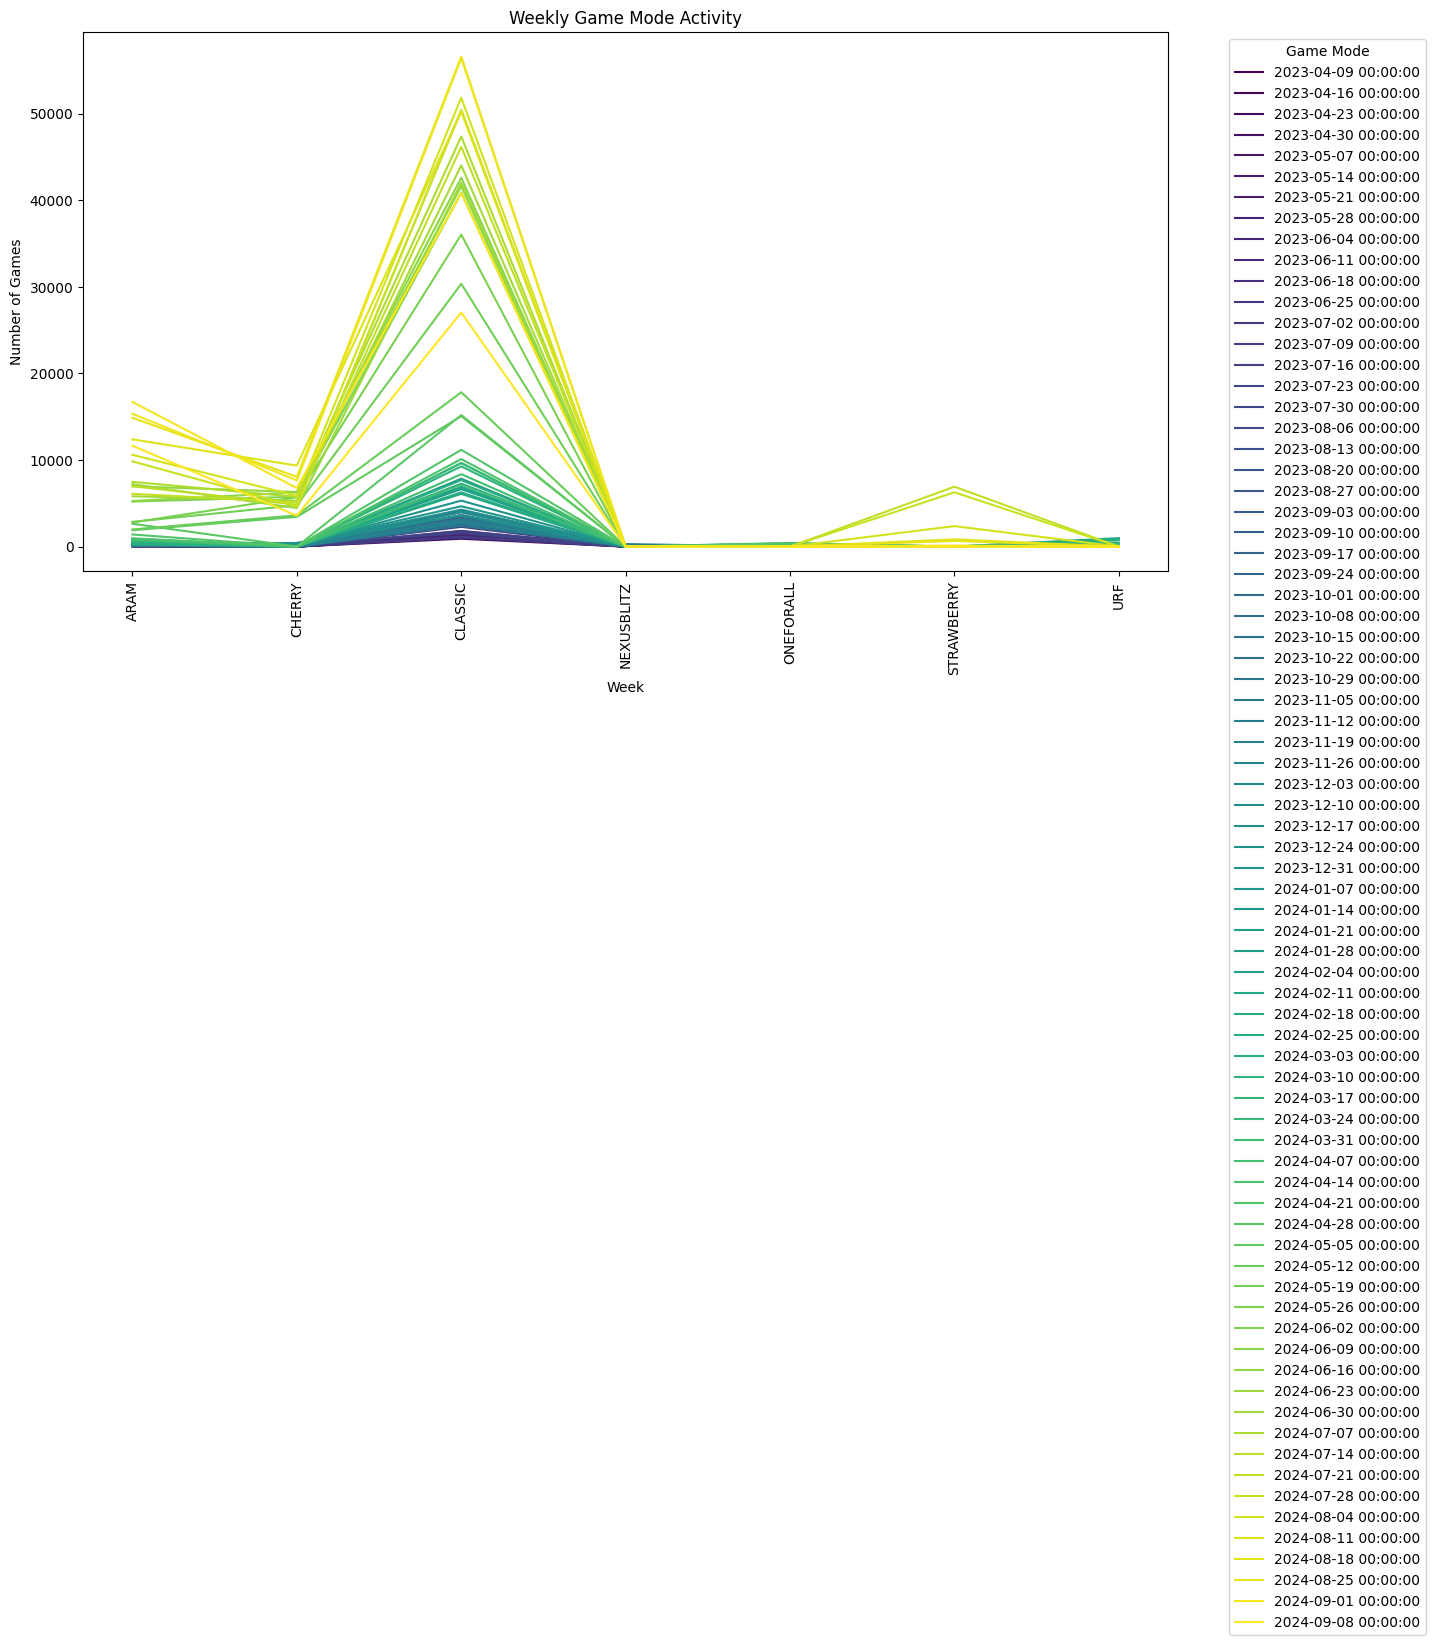

In [7]:
df['game_creation_dt'] = pd.to_datetime(df['game_creation_dt'])  # Convert if necessary
df.set_index('game_creation_dt', inplace=True)

# Resample to group by week and count games per mode
weekly_data = df.groupby('game_mode').resample('W').size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(14, 7))
colors = plt.cm.viridis(np.linspace(0, 1, len(weekly_data.columns)))  # Using a colormap
for mode, color in zip(weekly_data.columns, colors):
    plt.plot(weekly_data.index, weekly_data[mode], label=mode, color=color)

plt.title('Weekly Game Mode Activity')
plt.xlabel('Week')
plt.ylabel('Number of Games')
plt.legend(title='Game Mode', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside
plt.xticks(rotation=90)  # Rotate date labels for better readability
plt.tight_layout()
plt.show()

In [8]:
# Filter the DataFrame to include only meaningful game_modes
filtered_df = df[df['game_mode'].isin(['CLASSIC', 'ARAM', 'CHERRY'])]

In [9]:
#removing the columns that are null
filtered_df = filtered_df.drop(columns=['spell1_id', 'spell2_id'])

In [10]:
print(filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1308986 entries, 2024-05-16 08:14:49.856000 to 2024-07-04 18:48:09.129000
Data columns (total 29 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   match_id              1308986 non-null  object 
 1   game_creation         1308986 non-null  int64  
 2   game_duration         1308986 non-null  int64  
 3   game_mode             1308986 non-null  object 
 4   game_type             1308986 non-null  object 
 5   game_version          1308986 non-null  object 
 6   map_id                1308986 non-null  int64  
 7   participant_id        1308986 non-null  int64  
 8   summoner_id           1308986 non-null  object 
 9   puuid                 1308986 non-null  object 
 10  champion_id           1308986 non-null  int64  
 11  item0                 1308986 non-null  int64  
 12  item1                 1308986 non-null  int64  
 13  item2                 1308986 non-null  

In [11]:
game_mode_counts = filtered_df['game_mode'].value_counts()
game_mode_counts

,count
game_mode,
CLASSIC,1025690
ARAM,172720
CHERRY,110576


In [12]:
#check unique game modes for rows where team_position is null
null_positions_modes = filtered_df[filtered_df['team_position'].isnull()]['game_mode'].unique()
print(null_positions_modes)

['CHERRY' 'ARAM' 'CLASSIC']


In [13]:
#isolate the null positions on classic games
classic_null_positions = filtered_df[(filtered_df['game_mode'] == 'CLASSIC') & (filtered_df['team_position'].isnull())]

# Display some of these rows to get an idea of the data
print(classic_null_positions.head())

                               match_id  game_creation  game_duration  \
game_creation_dt                                                        
2024-06-30 17:22:15.058  NA1_5030381543  1719768135058            128   
2024-07-02 18:22:59.877  NA1_5031670975  1719944579877            137   
2024-07-21 05:02:18.563  NA1_5051517822  1721538138563            151   
2024-07-23 05:14:41.104  NA1_5056477241  1721711681104            135   
2024-07-24 09:36:48.747  NA1_5058959614  1721813808747           1824   

                        game_mode     game_type    game_version  map_id  \
game_creation_dt                                                          
2024-06-30 17:22:15.058   CLASSIC  MATCHED_GAME  14.13.596.7996      11   
2024-07-02 18:22:59.877   CLASSIC  MATCHED_GAME  14.13.598.9749      11   
2024-07-21 05:02:18.563   CLASSIC  MATCHED_GAME  14.14.602.7801      11   
2024-07-23 05:14:41.104   CLASSIC  MATCHED_GAME  14.14.603.4237      11   
2024-07-24 09:36:48.747   CLASSIC  MAT

In [14]:
print(classic_null_positions.describe(include='all'))

              match_id  game_creation  game_duration game_mode     game_type  \
count              927   9.270000e+02     927.000000       927           927   
unique             896            NaN            NaN         1             2   
top     NA1_5071584454            NaN            NaN   CLASSIC  MATCHED_GAME   
freq                 2            NaN            NaN       927           926   
mean               NaN   1.714929e+12     476.072276       NaN           NaN   
std                NaN   1.127913e+10     575.260730       NaN           NaN   
min                NaN   1.680592e+12     120.000000       NaN           NaN   
25%                NaN   1.712539e+12     139.500000       NaN           NaN   
50%                NaN   1.719327e+12     175.000000       NaN           NaN   
75%                NaN   1.722823e+12     405.000000       NaN           NaN   
max                NaN   1.725611e+12    2674.000000       NaN           NaN   

          game_version  map_id  partici

In [15]:
filtered_df.loc[(filtered_df['game_mode'] == 'CLASSIC') & (filtered_df['team_position'].isnull()), 'team_position'] = 'Unknown'

# Verify the update
remaining_classic_nulls = filtered_df[(filtered_df['game_mode'] == 'CLASSIC')]['team_position'].isnull().sum()
print(f"Remaining nulls in 'team_position' for CLASSIC: {remaining_classic_nulls}")

Remaining nulls in 'team_position' for CLASSIC: 0


In [16]:
# Assign 'All Mid' to 'team_position' for 'ARAM' games
filtered_df.loc[filtered_df['game_mode'] == 'ARAM', 'team_position'] = filtered_df.loc[filtered_df['game_mode'] == 'ARAM', 'team_position'].fillna('All Mid')

# Assign 'Duo' to 'team_position' for 'CHERRY' games
filtered_df.loc[filtered_df['game_mode'] == 'CHERRY', 'team_position'] = filtered_df.loc[filtered_df['game_mode'] == 'CHERRY', 'team_position'].fillna('Duo')

# Verify the updates
remaining_aram_nulls = filtered_df[filtered_df['game_mode'] == 'ARAM']['team_position'].isnull().sum()
remaining_cherry_nulls = filtered_df[filtered_df['game_mode'] == 'CHERRY']['team_position'].isnull().sum()
print(f"Remaining nulls in 'team_position' for ARAM: {remaining_aram_nulls}")
print(f"Remaining nulls in 'team_position' for CHERRY: {remaining_cherry_nulls}")

Remaining nulls in 'team_position' for ARAM: 0
Remaining nulls in 'team_position' for CHERRY: 0


In [17]:
# Check for any remaining nulls across all modes
print("Total remaining nulls in 'team_position':", filtered_df['team_position'].isnull().sum())


Total remaining nulls in 'team_position': 0


In [18]:
print(filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1308986 entries, 2024-05-16 08:14:49.856000 to 2024-07-04 18:48:09.129000
Data columns (total 29 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   match_id              1308986 non-null  object 
 1   game_creation         1308986 non-null  int64  
 2   game_duration         1308986 non-null  int64  
 3   game_mode             1308986 non-null  object 
 4   game_type             1308986 non-null  object 
 5   game_version          1308986 non-null  object 
 6   map_id                1308986 non-null  int64  
 7   participant_id        1308986 non-null  int64  
 8   summoner_id           1308986 non-null  object 
 9   puuid                 1308986 non-null  object 
 10  champion_id           1308986 non-null  int64  
 11  item0                 1308986 non-null  int64  
 12  item1                 1308986 non-null  int64  
 13  item2                 1308986 non-null  

In [19]:
filtered_df['game_creation_dt'] = pd.to_datetime(filtered_df['game_creation'], unit='ms')

In [20]:
print(filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1308986 entries, 2024-05-16 08:14:49.856000 to 2024-07-04 18:48:09.129000
Data columns (total 30 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   match_id              1308986 non-null  object        
 1   game_creation         1308986 non-null  int64         
 2   game_duration         1308986 non-null  int64         
 3   game_mode             1308986 non-null  object        
 4   game_type             1308986 non-null  object        
 5   game_version          1308986 non-null  object        
 6   map_id                1308986 non-null  int64         
 7   participant_id        1308986 non-null  int64         
 8   summoner_id           1308986 non-null  object        
 9   puuid                 1308986 non-null  object        
 10  champion_id           1308986 non-null  int64         
 11  item0                 1308986 non-null  int64         


In [21]:
summary_stats = filtered_df.describe()
print(summary_stats)

       game_creation  game_duration        map_id  participant_id  \
count   1.308986e+06   1.308986e+06  1.308986e+06    1.308986e+06   
mean    1.717372e+12   1.600487e+03  1.273697e+01    5.743205e+00   
min     1.680480e+12   7.400000e+01  1.100000e+01    1.000000e+00   
25%     1.715936e+12   1.285000e+03  1.100000e+01    3.000000e+00   
50%     1.719765e+12   1.610000e+03  1.100000e+01    6.000000e+00   
75%     1.722907e+12   1.934000e+03  1.100000e+01    8.000000e+00   
max     1.725613e+12   4.245000e+03  3.000000e+01    1.600000e+01   
std     8.368161e+09   5.053414e+02  5.254544e+00    3.160378e+00   

        champion_id         item0         item1         item2         item3  \
count  1.308986e+06  1.308986e+06  1.308986e+06  1.308986e+06  1.308986e+06   
mean   1.816106e+02  2.323544e+04  2.436661e+04  3.402082e+04  2.158418e+04   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.800000e+01  2.503000e+03  3.031000e+03  3.020000e+03 

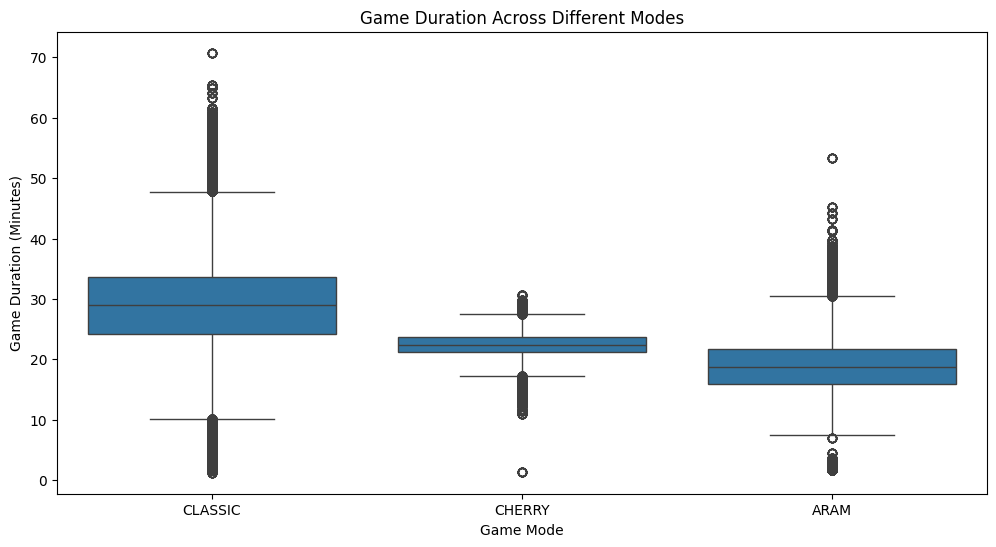

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='game_mode', y='game_duration_min', data=filtered_df)
plt.title('Game Duration Across Different Modes')
plt.xlabel('Game Mode')
plt.ylabel('Game Duration (Minutes)')
plt.show()

In [23]:
cols_to_drop = ['item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6']

filtered_df.drop(columns=cols_to_drop, inplace=True)

# Display the updated DataFrame info to confirm the changes
print(filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1308986 entries, 2024-05-16 08:14:49.856000 to 2024-07-04 18:48:09.129000
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   match_id              1308986 non-null  object        
 1   game_creation         1308986 non-null  int64         
 2   game_duration         1308986 non-null  int64         
 3   game_mode             1308986 non-null  object        
 4   game_type             1308986 non-null  object        
 5   game_version          1308986 non-null  object        
 6   map_id                1308986 non-null  int64         
 7   participant_id        1308986 non-null  int64         
 8   summoner_id           1308986 non-null  object        
 9   puuid                 1308986 non-null  object        
 10  champion_id           1308986 non-null  int64         
 11  kills                 1308986 non-null  int64         


In [24]:
#Including the summoner_details dataset so I filter match details related to the target accounts
summoner_details_df = pd.read_csv(os.path.join(BASE_FILE_PATH, 'summoner_details.csv'))
summoner_details_df.head()

,summoner_id,account_id,puuid,profile_icon_id,revision_date,summoner_level
0,__xDFd1kZUVRPTyAxKva6K7wxKSSySOQrxbnLXGlORtAhOU,XSGaPKakuZHj1VdpmfPp4ExyB1ybfFr5lQUPSMh5R1XuWQ,8AwbYwK3VvKk2_RtGM1gTdANRkhoCcuSRu-NWyXTbLEzPl...,4655,1725413371000,262
1,_-W8LreB2aP7IWEr8ZNkZ-DoxmPpElvtgrB5QDwwX1MupWnf,6n6iLj6O4gpa_fCbNb2n0KVdeGvoaTE3S1cntJrfd-Wje-...,eRbbvX41pkkfQyQWMc7cYuwoP9PIgrNRzLn44Q4QbSZLni...,4589,1723848302000,91
2,_1iTC6SQFB-mQBvHCWYlUW-EdLuJ46ENs1ZOjqMwO6pn-C...,-QF-uxrzgEcNIdeK_5EjAAVXjCb5uaeynXq6nZtIbgxIMU...,ezCpI4N6QqBs2Ft__XUnG80TvnPdM4T49J-Kcc2rkwXe6A...,3862,1725432837034,451
3,_2ymSgNRHwl_kPAPZhMfJVq33BcNUpGLtsQWhoGGar-u0IH2,LB8n6PGTKUecSyrUCV0rzB44QqJI1IxjPToIRrg2vcQV-i...,0S2pHoFrVHu29-uAB88Bh3i6KyuRL6dMxuUDrrs5MloYjV...,6296,1723861085000,455
4,_5JjFHW-9fU5Nxvgj1ohjsTaRz0jyEJyuLdMrka1KN7gZzYY,e8Mku8upTgSAFitcACFtYlRMYAuVpViWR8g36Fu8CL0Q7T...,jS88OXUDsGmaYLcMvwsY8YmzC8RZldDU2ShLg_ZPX2Hy40...,7,1723052019000,55


In [26]:
summoner_ids = summoner_details_df['summoner_id'].unique()

In [27]:
filtered_df = filtered_df[filtered_df['summoner_id'].isin(summoner_ids)]

In [28]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129529 entries, 2024-05-16 08:14:49.856000 to 2024-07-04 18:48:09.129000
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   match_id              129529 non-null  object        
 1   game_creation         129529 non-null  int64         
 2   game_duration         129529 non-null  int64         
 3   game_mode             129529 non-null  object        
 4   game_type             129529 non-null  object        
 5   game_version          129529 non-null  object        
 6   map_id                129529 non-null  int64         
 7   participant_id        129529 non-null  int64         
 8   summoner_id           129529 non-null  object        
 9   puuid                 129529 non-null  object        
 10  champion_id           129529 non-null  int64         
 11  kills                 129529 non-null  int64         
 12  deaths    

In [29]:
#saving the progress till  now to ensure I dont need to run the whole code each time I access the file
filtered_df.to_csv(os.path.join(BASE_FILE_PATH, 'filtered_dataset.csv'), index=False)

In [ ]:
#sort dataset by game_creation
filtered_df.sort_values('game_creation_dt', inplace=True)

In [35]:
def segment_time_periods(group):
    # Sort the group by date
    group = group.sort_values('game_creation_dt')
    total_matches = len(group)
    # Handle groups with fewer than three matches
    if total_matches < 3:
        group['time_segment'] = 'Single Period'  # Assign all to a single segment
    else:
        # Define quantile indices for segmentation
        quantiles = [total_matches // 3, 2 * total_matches // 3, total_matches]
        # Ensure unique bins by checking quantile values
        if quantiles[0] == quantiles[1]:  # Adjust if two quantiles are the same
            quantiles[1] += 1
        # Create time segments using linear positions
        positions = range(total_matches)
        group['time_segment'] = pd.cut(positions,
                                       bins=[-1, quantiles[0], quantiles[1], quantiles[2]],
                                       labels=['First Period', 'Second Period', 'Third Period'],
                                       include_lowest=True)
    return group

# Apply the segmentation function to each group of summoner data
filtered_df = filtered_df.groupby('summoner_id').apply(segment_time_periods)

# Reset the index after grouping to maintain a clean DataFrame structure
filtered_df.reset_index(drop=True, inplace=True)



In [36]:
filtered_df.head()

,match_id,game_creation,game_duration,game_mode,game_type,game_version,map_id,participant_id,summoner_id,puuid,...,total_damage_dealt,total_damage_taken,gold_earned,vision_score,total_minions_killed,team_position,win,game_duration_min,game_creation_dt,time_segment
0,NA1_4967002924,1712434308642,1087,CLASSIC,MATCHED_GAME,14.7.571.9528,11,5,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,z_Fsi2R5ah8GZsOrkqpdobOUAqOZF3_eqwfuQctrX8ehlD...,...,21894,6011,5934,24,37,UTILITY,True,18.116667,2024-04-06 20:11:48.642,First Period
1,NA1_5050183543,1721508545865,1282,ARAM,MATCHED_GAME,14.14.602.7801,12,10,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,z_Fsi2R5ah8GZsOrkqpdobOUAqOZF3_eqwfuQctrX8ehlD...,...,138247,41918,16715,0,116,All Mid,True,21.366667,2024-07-20 20:49:05.865,First Period
2,NA1_5050376845,1721513174857,1327,ARAM,MATCHED_GAME,14.14.602.7801,12,5,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,z_Fsi2R5ah8GZsOrkqpdobOUAqOZF3_eqwfuQctrX8ehlD...,...,110883,33804,14813,0,69,All Mid,False,22.116667,2024-07-20 22:06:14.857,First Period
3,NA1_5052219350,1721575116568,1344,ARAM,MATCHED_GAME,14.14.602.7801,12,10,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,z_Fsi2R5ah8GZsOrkqpdobOUAqOZF3_eqwfuQctrX8ehlD...,...,135813,42284,14972,0,112,All Mid,False,22.400000,2024-07-21 15:18:36.568,First Period
4,NA1_5052262521,1721577348686,1261,ARAM,MATCHED_GAME,14.14.602.7801,12,7,--yDuIIktIqjdme32tV29wcBIFPE08CY8WhiZhL4Gd6p60aE,z_Fsi2R5ah8GZsOrkqpdobOUAqOZF3_eqwfuQctrX8ehlD...,...,62148,30458,15335,0,24,All Mid,True,21.016667,2024-07-21 15:55:48.686,First Period


In [40]:
matches_per_summoner = filtered_df['summoner_id'].value_counts()



In [41]:
summoner_match_counts = matches_per_summoner.value_counts().sort_index()

In [43]:
print(summoner_match_counts)

count
1     8
2     2
3     7
4     6
5     3
     ..
71    1
72    1
79    1
93    1
97    1
Name: count, Length: 74, dtype: int64


In [44]:
summoner_ids_fewer_than_30 = matches_per_summoner[matches_per_summoner < 30].index
filtered_df = filtered_df[~filtered_df['summoner_id'].isin(summoner_ids_fewer_than_30)]

matches_per_summoner_post_filter = filtered_df['summoner_id'].value_counts()

# Display the result to verify
print(matches_per_summoner_post_filter)

summoner_id
0al35vejbVK4Gj6RSHMKfx_9JCcMxnYrxuPXwjNzqVJVneCY              97
nO6YoWK2py_flLW3_1ygILlu1l4rvItHHhf_CZ5u-zj8fYOl              93
dpNtOqmWht5TewysTB_UsF8ofvs1G5ZqljItL-w_KC-47D4A              79
TAv1TLyVXnRWSbWziC1VD85GIcZUze2pvmSzJp4GnjN0H2xe              72
Li9SYoQwMP62BrkhXrbFXRjmKOl2DdwrQ_ehboGxeGRjk_4H              71
                                                              ..
Ao_K9D-QrgpgDmrdDlT9xcJxKNNekH2pRNi6KwVWWfyGCsw               30
NNzoAjh9H9HFGLxmpSkdyk-7cFAcCcEMwhz536KtWqKIBdM               30
xTHJFY2g4lWMfdRZL3YkIlcV2Ak6bd4quBoOjTq9SbGMVJLO              30
CSiA124Sa1fhcGHzMA-ThAp2m3JuRiD0ywX2hhJQJCuKEyxL              30
EogRVfLI6emrm9nIPn9Lagu52x2BZ4nk-qL-peFAQoK_-Ht2vST6SKdwFw    30
Name: count, Length: 2274, dtype: int64


In [46]:
filtered_df.to_csv(os.path.join(BASE_FILE_PATH, 'filtered_+30_matches_dataset.csv'), index=False)

In [47]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128021 entries, 0 to 129528
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   match_id              128021 non-null  object        
 1   game_creation         128021 non-null  int64         
 2   game_duration         128021 non-null  int64         
 3   game_mode             128021 non-null  object        
 4   game_type             128021 non-null  object        
 5   game_version          128021 non-null  object        
 6   map_id                128021 non-null  int64         
 7   participant_id        128021 non-null  int64         
 8   summoner_id           128021 non-null  object        
 9   puuid                 128021 non-null  object        
 10  champion_id           128021 non-null  int64         
 11  kills                 128021 non-null  int64         
 12  deaths                128021 non-null  int64         
 13  assi